In [1]:
# For autoreloading modules
%load_ext autoreload
%autoreload 2
# For notebook plotting
%matplotlib inline




In [2]:
# Standard libraries
import os
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from pdpbox import pdp
from plotnine import *
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor
from IPython.display import display

# Machine Learning
import sklearn
from sklearn import metrics
from scipy.cluster import hierarchy as hc
from fastai.imports import *
from fastai.structured import *

In [40]:
# train = pd.read_csv('trainset/train_h.csv')

train.info()

In [ ]:
# train.drop(columns = ['Id'], inplace=True)
# train.drop(columns = ['groupId'], inplace=True)


In [41]:
# other = train[train['matchType']=='Other']

solo.info()

duo = train[train['matchType']=='duo']

duo

squad = train[train['matchType']=='squad']

squad

squad.info()

solo.to_csv("trainset/solo.csv",sep=",",header=True)
duo.to_csv("trainset/duo.csv",sep=",",header=True)
squad.to_csv("trainset/squad.csv",sep=",",header=True)

In [42]:
# other.to_csv("trainset/other.csv",sep=",",header=True)

In [3]:
solo = pd.read_csv('trainset/solo.csv')
duo = pd.read_csv('trainset/duo.csv')
squad = pd.read_csv('trainset/squad.csv')
other = pd.read_csv('trainset/other.csv')

In [4]:
solo.drop(columns = ['matchType'], inplace=True)
duo.drop(columns = ['matchType'], inplace=True)
squad.drop(columns = ['matchType'], inplace=True)
other.drop(columns = ['matchType'], inplace=True)

In [5]:
def train_test_split(df, test_size=0.1):
    match_ids = df['matchId'].unique().tolist()
    train_size = int(len(match_ids) * (1 - test_size))
    train_match_ids = random.sample(match_ids, train_size)

    train = df[df['matchId'].isin(train_match_ids)]
    test = df[-df['matchId'].isin(train_match_ids)]
    
    return train, test

In [6]:
target = 'winPlacePerc'

In [7]:
cols_to_fit_solo = [col for col in solo.columns if col not in ['matchId',target,'Unnamed: 0','Unnamed: 0.1']]
train_solo, val_solo = train_test_split(solo, 0.1)

In [8]:
#!pip install lightgbm

In [9]:
from lightgbm import LGBMRegressor

[20]	valid_0's l1: 0.0467247
[40]	valid_0's l1: 0.0439753
[60]	valid_0's l1: 0.0427997
[80]	valid_0's l1: 0.0422935
[100]	valid_0's l1: 0.0417861


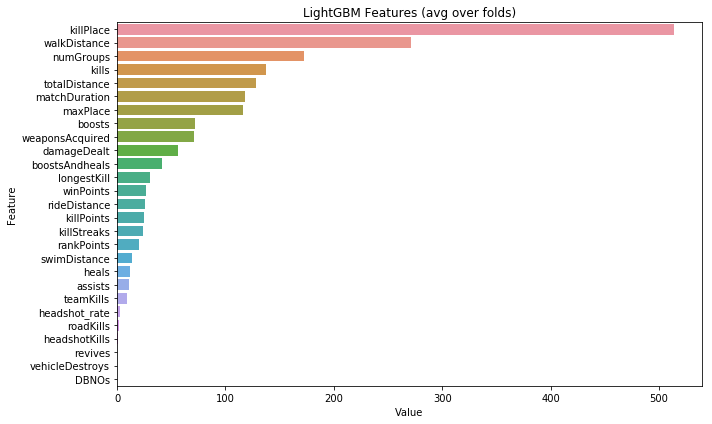

In [9]:
from lightgbm import LGBMRegressor
params = {
    'n_estimators': 100,
    'learning_rate': 0.3, 
    'num_leaves': 20,
    'objective': 'regression_l2', 
    'metric': 'mae',
    'verbose': -1,
}

model = LGBMRegressor(**params)

model.fit(
    solo[cols_to_fit_solo], solo[target],
    eval_set=[(val_solo[cols_to_fit_solo], val_solo[target])],
    eval_metric='mae',
    verbose=20,
)

feature_importance = pd.DataFrame(sorted(zip(model.feature_importances_, cols_to_fit_solo)), columns=['Value','Feature'])

plt.figure(figsize=(10, 6))
sns.barplot(x="Value", y="Feature", data=feature_importance.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9881 entries, 0 to 9880
Data columns (total 33 columns):
Unnamed: 0         9881 non-null int64
Unnamed: 0.1       9881 non-null int64
Id                 9881 non-null object
groupId            9881 non-null object
matchId            9881 non-null object
assists            9881 non-null int64
boosts             9881 non-null int64
damageDealt        9881 non-null float64
DBNOs              9881 non-null int64
headshotKills      9881 non-null int64
heals              9881 non-null int64
killPlace          9881 non-null int64
killPoints         9881 non-null int64
kills              9881 non-null int64
killStreaks        9881 non-null int64
longestKill        9881 non-null float64
matchDuration      9881 non-null int64
maxPlace           9881 non-null int64
numGroups          9881 non-null int64
rankPoints         9881 non-null int64
revives            9881 non-null int64
rideDistance       9881 non-null float64
roadKills          9881 no

In [10]:
cols_to_fit_duo = [col for col in duo.columns if col not in ['matchId',target,'Unnamed: 0','Unnamed: 0.1']]
train_duo, val_duo = train_test_split(duo, 0.1)

[20]	valid_0's l1: 0.0542096
[40]	valid_0's l1: 0.0515614
[60]	valid_0's l1: 0.0506516
[80]	valid_0's l1: 0.0501894
[100]	valid_0's l1: 0.0498801


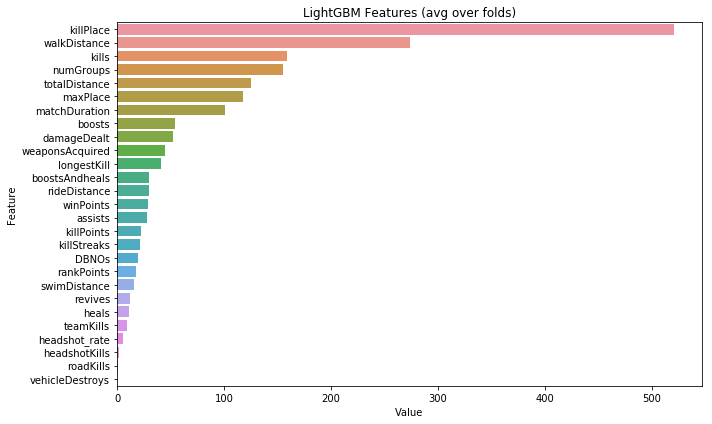

In [11]:
from lightgbm import LGBMRegressor
params = {
    'n_estimators': 100,
    'learning_rate': 0.3, 
    'num_leaves': 20,
    'objective': 'regression_l2', 
    'metric': 'mae',
    'verbose': -1,
}

model1 = LGBMRegressor(**params)

model1.fit(
    duo[cols_to_fit_duo], duo[target],
    eval_set=[(val_duo[cols_to_fit_duo], val_duo[target])],
    eval_metric='mae',
    verbose=20,
)

feature_importance = pd.DataFrame(sorted(zip(model1.feature_importances_, cols_to_fit_duo)), columns=['Value','Feature'])

plt.figure(figsize=(10, 6))
sns.barplot(x="Value", y="Feature", data=feature_importance.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()

In [11]:
cols_to_fit_squad = [col for col in squad.columns if col not in ['matchId',target,'Unnamed: 0','Unnamed: 0.1']]
train_squad, val_squad = train_test_split(squad, 0.1)

[20]	valid_0's l1: 0.071611
[40]	valid_0's l1: 0.0689798
[60]	valid_0's l1: 0.068171
[80]	valid_0's l1: 0.0677924
[100]	valid_0's l1: 0.0673533


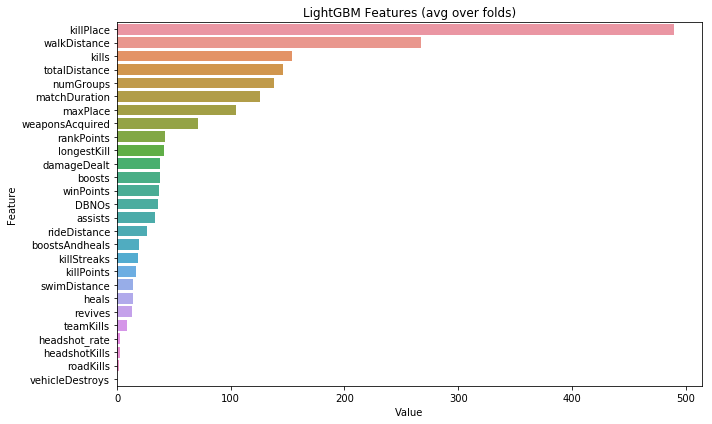

In [13]:
from lightgbm import LGBMRegressor
params = {
    'n_estimators': 100,
    'learning_rate': 0.3, 
    'num_leaves': 20,
    'objective': 'regression_l2', 
    'metric': 'mae',
    'verbose': -1,
}

model2 = LGBMRegressor(**params)

model2.fit(
    squad[cols_to_fit_squad], squad[target],
    eval_set=[(val_squad[cols_to_fit_squad], val_squad[target])],
    eval_metric='mae',
    verbose=20,
)

feature_importance = pd.DataFrame(sorted(zip(model2.feature_importances_, cols_to_fit_squad)), columns=['Value','Feature'])

plt.figure(figsize=(10, 6))
sns.barplot(x="Value", y="Feature", data=feature_importance.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()

In [10]:
#!pip install shap
import shap
shap.initjs()


In [11]:
explainer = shap.TreeExplainer(model)
shap_values_solo = explainer.shap_values(val_solo[cols_to_fit_solo])

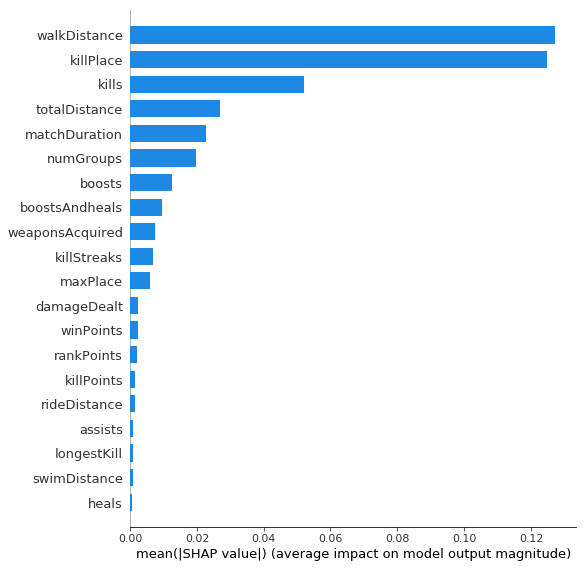

In [12]:
shap.summary_plot(shap_values_solo, val_solo[cols_to_fit_solo], plot_type='bar')

In [12]:
# select top 20 important features of solo mode
cols_to_fit_solo = ['walkDistance','killPlace','kills','totalDistance','matchDuration','numGroups',
                    'boosts','boostsAndheals','weaponsAcquired','killStreaks','maxPlace','winPoints','damageDealt'
                    ,'rankPoints','killPoints','rideDistance','assists','longestKill','swimDistance','heals']

In [13]:
params_solo = {
    'objective': 'regression_l2', #'mae'
    'num_leaves': 300,  #
    'learning_rate': 0.1, #0.03
    'n_estimators': 1000, #6000
    'max_depth':12,
    'max_bin':100,  #
    'bagging_fraction':0.8,
    'bagging_freq':5,
    'feature_fraction':0.9,
    'metric': 'mae',
    'verbose':-1, 
    'early_stopping_rounds':100
    }


# LightGBM parameters
lgbm_reg_solo = LGBMRegressor(**params_solo)

lgbm_reg_solo.fit(
    solo[cols_to_fit_solo], solo[target],
    eval_set=[(val_solo[cols_to_fit_solo], val_solo[target])],
    eval_metric='mae',
    verbose=50,
)


# from lightgbm import LGBMRegressor
# params = {
#     'n_estimators': 100,
#     'learning_rate': 0.3, 
#     'num_leaves': 20,
#     'objective': 'regression_l2', 
#     'metric': 'mae',
#     'verbose': -1,
# }

# model = LGBMRegressor(**params)

# model.fit(
#     solo[cols_to_fit_solo], solo[target],
#     eval_set=[(val_solo[cols_to_fit_solo], val_solo[target])],
#     eval_metric='mae',
#     verbose=20,
# )


Training until validation scores don't improve for 100 rounds.
[50]	valid_0's l1: 0.0405862
[100]	valid_0's l1: 0.0388762
[150]	valid_0's l1: 0.0380284
[200]	valid_0's l1: 0.0373403
[250]	valid_0's l1: 0.0367271
[300]	valid_0's l1: 0.0361904
[350]	valid_0's l1: 0.0356054
[400]	valid_0's l1: 0.0351068
[450]	valid_0's l1: 0.0346461
[500]	valid_0's l1: 0.0342164
[550]	valid_0's l1: 0.033789
[600]	valid_0's l1: 0.03337
[650]	valid_0's l1: 0.032912
[700]	valid_0's l1: 0.0325062
[750]	valid_0's l1: 0.0321002
[800]	valid_0's l1: 0.0317073
[850]	valid_0's l1: 0.0313402
[900]	valid_0's l1: 0.030983
[950]	valid_0's l1: 0.0306704
[1000]	valid_0's l1: 0.0303247
Did not meet early stopping. Best iteration is:
[1000]	valid_0's l1: 0.0303247


LGBMRegressor(bagging_fraction=0.8, bagging_freq=5, boosting_type='gbdt',
       class_weight=None, colsample_bytree=1.0, early_stopping_rounds=100,
       feature_fraction=0.9, importance_type='split', learning_rate=0.1,
       max_bin=100, max_depth=12, metric='mae', min_child_samples=20,
       min_child_weight=0.001, min_split_gain=0.0, n_estimators=1000,
       n_jobs=-1, num_leaves=300, objective='regression_l2',
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0,
       verbose=-1)

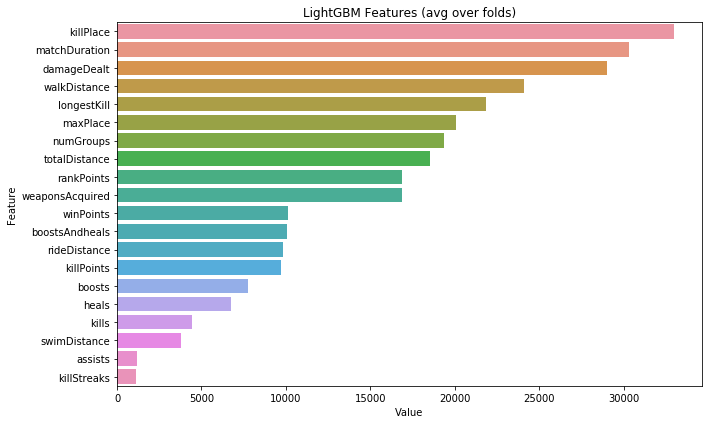

In [33]:
feature_importance = pd.DataFrame(sorted(zip(lgbm_reg_solo.feature_importances_, cols_to_fit_solo)), columns=['Value','Feature'])

plt.figure(figsize=(10, 6))
sns.barplot(x="Value", y="Feature", data=feature_importance.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()

In [14]:
#!pip install shap
import shap
shap.initjs()

In [38]:
explainer = shap.TreeExplainer(lgbm_reg_solo)


In [39]:
shap_values_solo = explainer.shap_values(val_solo[cols_to_fit_solo])

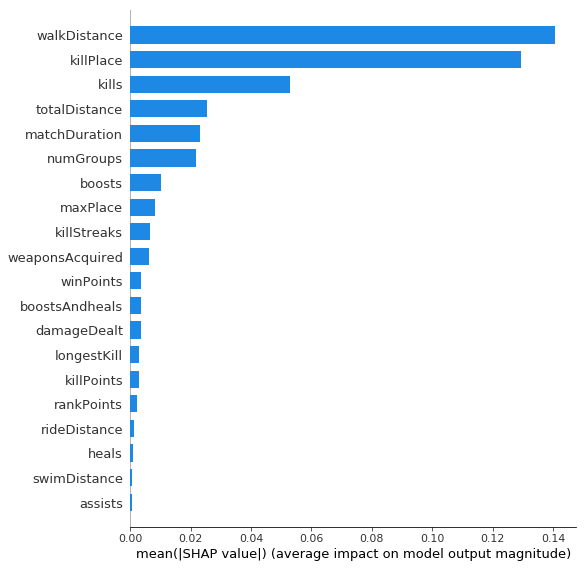

In [40]:
shap.summary_plot(shap_values_solo, val_solo[cols_to_fit_solo], plot_type='bar')

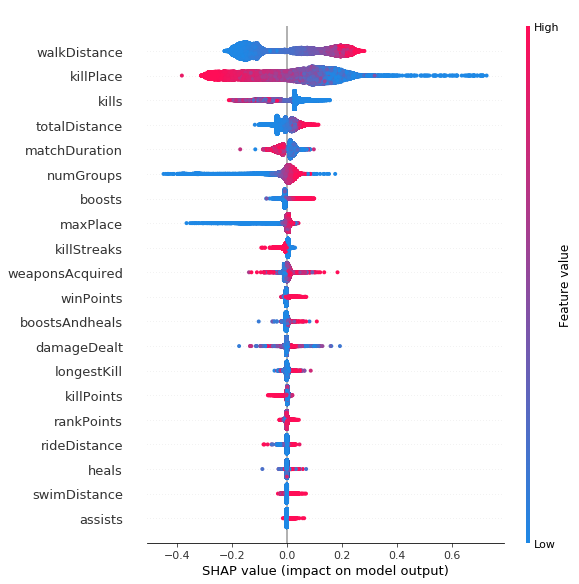

In [41]:
shap.summary_plot(shap_values_solo, val_solo[cols_to_fit_solo], feature_names=cols_to_fit_solo)

In [ ]:
explainer1 = shap.TreeExplainer(model1)
shap_values_duo = explainer1.shap_values(val_duo[cols_to_fit_duo])

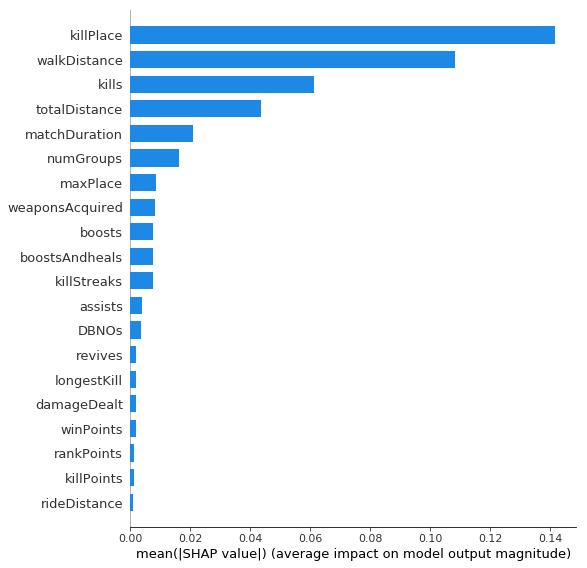

In [18]:
shap.summary_plot(shap_values_duo, val_duo[cols_to_fit_duo], plot_type='bar')

In [42]:
# select top 20 important features of duo mode
cols_to_fit_duo = ['killPlace','walkDistance','kills','totalDistance','matchDuration','numGroups','maxPlace',
                  'weaponsAcquired','boosts','boostsAndheals','killStreaks','assists','DBNOs','revives','longestKill',
                  'damageDealt','winPoints','rankPoints','killPoints','rideDistance']

In [51]:
from sklearn.model_selection import GridSearchCV### 我们可以创建lgb的sklearn模型，使用上面选择的(学习率，评估器数目)
model_lgb = LGBMRegressor(objective='mae',num_leaves=70,
                              learning_rate=0.1, n_estimators=43, max_depth=6,
                              metric='mae', bagging_fraction = 0.8,feature_fraction = 0.8)

params_test1={    'max_depth': range(3,8,2),    'num_leaves':range(50, 170, 30)
}
gsearch1 = GridSearchCV(estimator=model_lgb, param_grid=params_test1, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=4)

gsearch1.fit(duo[cols_to_fit_duo], duo[target])
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_



Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  4.2min
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:  7.3min finished


([mean: -0.00936, std: 0.00007, params: {'max_depth': 3, 'num_leaves': 50},
  mean: -0.00936, std: 0.00007, params: {'max_depth': 3, 'num_leaves': 80},
  mean: -0.00936, std: 0.00007, params: {'max_depth': 3, 'num_leaves': 110},
  mean: -0.00936, std: 0.00007, params: {'max_depth': 3, 'num_leaves': 140},
  mean: -0.00692, std: 0.00011, params: {'max_depth': 5, 'num_leaves': 50},
  mean: -0.00692, std: 0.00011, params: {'max_depth': 5, 'num_leaves': 80},
  mean: -0.00692, std: 0.00011, params: {'max_depth': 5, 'num_leaves': 110},
  mean: -0.00692, std: 0.00011, params: {'max_depth': 5, 'num_leaves': 140},
  mean: -0.00594, std: 0.00004, params: {'max_depth': 7, 'num_leaves': 50},
  mean: -0.00574, std: 0.00007, params: {'max_depth': 7, 'num_leaves': 80},
  mean: -0.00566, std: 0.00007, params: {'max_depth': 7, 'num_leaves': 110},
  mean: -0.00564, std: 0.00006, params: {'max_depth': 7, 'num_leaves': 140}],
 {'max_depth': 7, 'num_leaves': 140},
 -0.005641822342454019)

In [50]:
params_test3={    'min_child_samples': [10, 12, 14, 16, 18],    'min_child_weight':[0.001, 0.002]
}
model_lgb = LGBMRegressor(objective='mae',num_leaves=140,
                              learning_rate=0.1, n_estimators=43, max_depth=7, 
                              metric='mae', bagging_fraction = 0.8, feature_fraction = 0.8)
gsearch3 = GridSearchCV(estimator=model_lgb, param_grid=params_test3, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=4)
gsearch3.fit(duo[cols_to_fit_duo], duo[target])
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_



Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  8.4min
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:  9.6min finished


([mean: -0.00516, std: 0.00003, params: {'min_child_samples': 10, 'min_child_weight': 0.001},
  mean: -0.00516, std: 0.00003, params: {'min_child_samples': 10, 'min_child_weight': 0.002},
  mean: -0.00517, std: 0.00002, params: {'min_child_samples': 12, 'min_child_weight': 0.001},
  mean: -0.00517, std: 0.00002, params: {'min_child_samples': 12, 'min_child_weight': 0.002},
  mean: -0.00517, std: 0.00002, params: {'min_child_samples': 14, 'min_child_weight': 0.001},
  mean: -0.00517, std: 0.00002, params: {'min_child_samples': 14, 'min_child_weight': 0.002},
  mean: -0.00515, std: 0.00002, params: {'min_child_samples': 16, 'min_child_weight': 0.001},
  mean: -0.00515, std: 0.00002, params: {'min_child_samples': 16, 'min_child_weight': 0.002},
  mean: -0.00515, std: 0.00003, params: {'min_child_samples': 18, 'min_child_weight': 0.001},
  mean: -0.00515, std: 0.00003, params: {'min_child_samples': 18, 'min_child_weight': 0.002}],
 {'min_child_samples': 18, 'min_child_weight': 0.001},
 -0.

In [53]:
params_test4={    'feature_fraction': [0.5, 0.6, 0.7, 0.8, 0.9],    'bagging_fraction': [0.6, 0.7, 0.8, 0.9, 1.0]
}
model_lgb = LGBMRegressor(objective='mae',num_leaves=140,
                              learning_rate=0.1, n_estimators=43, max_depth=7, 
                              metric='mae', bagging_freq = 5,  min_child_samples=18,
                             min_child_weight=0.001)
gsearch4 = GridSearchCV(estimator=model_lgb, param_grid=params_test4, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=4)
gsearch4.fit(duo[cols_to_fit_duo], duo[target])
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_




Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  8.3min
[Parallel(n_jobs=4)]: Done 125 out of 125 | elapsed: 25.3min finished


([mean: -0.00639, std: 0.00009, params: {'bagging_fraction': 0.6, 'feature_fraction': 0.5},
  mean: -0.00595, std: 0.00003, params: {'bagging_fraction': 0.6, 'feature_fraction': 0.6},
  mean: -0.00577, std: 0.00005, params: {'bagging_fraction': 0.6, 'feature_fraction': 0.7},
  mean: -0.00566, std: 0.00008, params: {'bagging_fraction': 0.6, 'feature_fraction': 0.8},
  mean: -0.00564, std: 0.00007, params: {'bagging_fraction': 0.6, 'feature_fraction': 0.9},
  mean: -0.00639, std: 0.00007, params: {'bagging_fraction': 0.7, 'feature_fraction': 0.5},
  mean: -0.00594, std: 0.00005, params: {'bagging_fraction': 0.7, 'feature_fraction': 0.6},
  mean: -0.00578, std: 0.00003, params: {'bagging_fraction': 0.7, 'feature_fraction': 0.7},
  mean: -0.00565, std: 0.00005, params: {'bagging_fraction': 0.7, 'feature_fraction': 0.8},
  mean: -0.00565, std: 0.00006, params: {'bagging_fraction': 0.7, 'feature_fraction': 0.9},
  mean: -0.00642, std: 0.00011, params: {'bagging_fraction': 0.8, 'feature_fract

In [19]:
# params_duo = {
#     'objective': 'mae',
#     'num_leaves': 300,
#     'learning_rate': 0.03,
#     'n_estimators': 4500,
#     'max_depth':16,
#     'max_bin':55,
#     'min_child_samples': 18,
#     'min_child_weight': 0.001,
#     'bagging_fraction':0.9,
#     'bagging_freq':5,
#     'feature_fraction':0.9,
#     'verbose':50, 
#     'early_stopping_rounds':100
#     }

# params = {
#     'n_estimators': 100,
#     'learning_rate': 0.3, 
#     'num_leaves': 20,
#     'objective': 'regression_l2', 
#     'metric': 'mae',
#     'verbose': -1,
# }

params_duo = {
    'objective': 'regression_l2', #'mae'
    'num_leaves': 300,  #
    'learning_rate': 0.1, #0.03
    'n_estimators': 1000, #6000
    'max_depth':12,
    'max_bin':100,  #
    'bagging_fraction':0.8,
    'bagging_freq':5,
    'feature_fraction':0.9,
    'metric': 'mae',
    'verbose':-1, 
    'early_stopping_rounds':100
    }


# LightGBM parameters
lgbm_reg_duo = LGBMRegressor(**params_duo)

lgbm_reg_duo.fit(
    duo[cols_to_fit_duo], duo[target],
    eval_set=[(val_duo[cols_to_fit_duo], val_duo[target])],
    eval_metric='mae',
    verbose=50,
)

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's l1: 0.0486272
[100]	valid_0's l1: 0.0473273
[150]	valid_0's l1: 0.0467143
[200]	valid_0's l1: 0.0462209
[250]	valid_0's l1: 0.045752
[300]	valid_0's l1: 0.0453623
[350]	valid_0's l1: 0.0449631
[400]	valid_0's l1: 0.0445668
[450]	valid_0's l1: 0.0442528
[500]	valid_0's l1: 0.0438849
[550]	valid_0's l1: 0.0435132
[600]	valid_0's l1: 0.0431774
[650]	valid_0's l1: 0.0428628
[700]	valid_0's l1: 0.0425634
[750]	valid_0's l1: 0.0422606
[800]	valid_0's l1: 0.0419532
[850]	valid_0's l1: 0.0416312
[900]	valid_0's l1: 0.0412865
[950]	valid_0's l1: 0.0410131
[1000]	valid_0's l1: 0.0407441
Did not meet early stopping. Best iteration is:
[1000]	valid_0's l1: 0.0407441


LGBMRegressor(bagging_fraction=0.8, bagging_freq=5, boosting_type='gbdt',
       class_weight=None, colsample_bytree=1.0, early_stopping_rounds=100,
       feature_fraction=0.9, importance_type='split', learning_rate=0.1,
       max_bin=100, max_depth=12, metric='mae', min_child_samples=20,
       min_child_weight=0.001, min_split_gain=0.0, n_estimators=1000,
       n_jobs=-1, num_leaves=300, objective='regression_l2',
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0,
       verbose=-1)

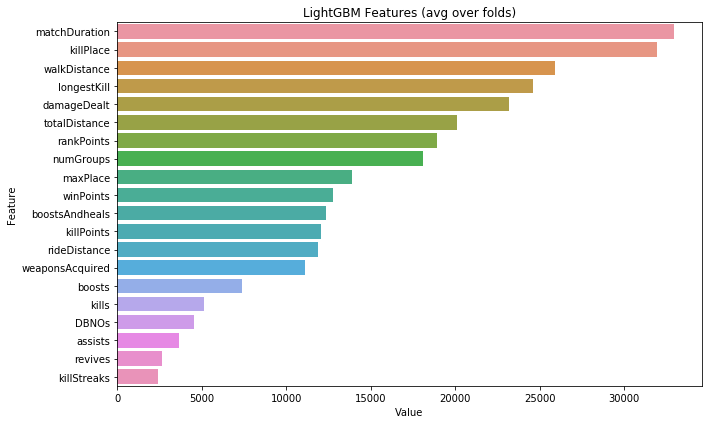

In [43]:
feature_importance = pd.DataFrame(sorted(zip(lgbm_reg_duo.feature_importances_, cols_to_fit_duo)), columns=['Value','Feature'])

plt.figure(figsize=(10, 6))
sns.barplot(x="Value", y="Feature", data=feature_importance.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()

In [44]:
explainer1 = shap.TreeExplainer(lgbm_reg_duo)


In [ ]:
shap_values_duo = explainer1.shap_values(val_duo[cols_to_fit_duo])

In [ ]:
shap.summary_plot(shap_values_duo, val_duo[cols_to_fit_duo], plot_type='bar')

In [19]:
explainer2 = shap.TreeExplainer(model2)
shap_values_squad = explainer2.shap_values(val_squad[cols_to_fit_squad])

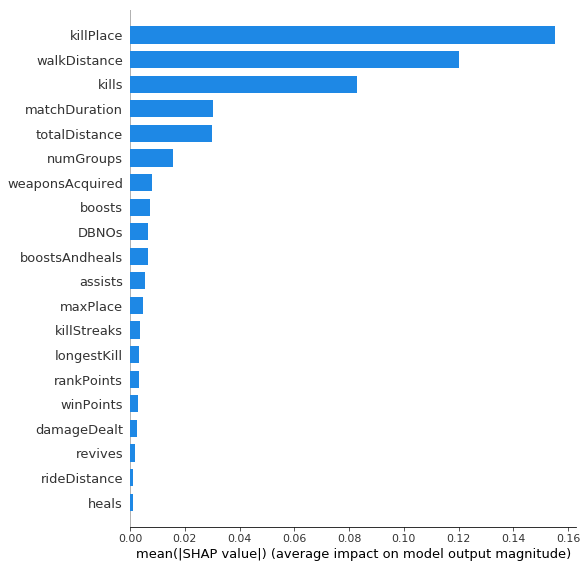

In [20]:
shap.summary_plot(shap_values_squad, val_squad[cols_to_fit_squad], plot_type='bar')

In [16]:
cols_to_fit_squad = ['killPlace','walkDistance','kills','matchDuration','totalDistance','numGroups',
                    'weaponsAcquired','boosts','DBNOs','boostsAndheals','assists','maxPlace','killStreaks',
                    'longestKill','rankPoints','winPoints','damageDealt','revives','rideDistance','heals']

In [17]:
params_squad = {
    'objective': 'mae',
    'num_leaves': 300,  #
    'learning_rate': 0.1, #0.03
    'n_estimators': 1000, #6000
    'max_depth':12,
    'max_bin':100,  #
    'bagging_fraction':0.8,
    'bagging_freq':5,
    'feature_fraction':0.9,
    'verbose':-1, 
    'early_stopping_rounds':100
    }




# LightGBM parameters
lgbm_reg_squad = LGBMRegressor(**params_squad)

lgbm_reg_squad.fit(
    squad[cols_to_fit_squad], squad[target],
    eval_set=[(val_squad[cols_to_fit_squad], val_squad[target])],
    eval_metric='mae',
    verbose=50,
)

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's l1: 0.0661645
[100]	valid_0's l1: 0.0650577
[150]	valid_0's l1: 0.0646006
[200]	valid_0's l1: 0.0642316
[250]	valid_0's l1: 0.0639315
[300]	valid_0's l1: 0.0636755
[350]	valid_0's l1: 0.0634723
[400]	valid_0's l1: 0.0632509
[450]	valid_0's l1: 0.0630269
[500]	valid_0's l1: 0.0628917
[550]	valid_0's l1: 0.0627006
[600]	valid_0's l1: 0.0625289
[650]	valid_0's l1: 0.0623513
[700]	valid_0's l1: 0.0621954
[750]	valid_0's l1: 0.0620561
[800]	valid_0's l1: 0.0619307
[850]	valid_0's l1: 0.0618085
[900]	valid_0's l1: 0.0616941
[950]	valid_0's l1: 0.0615818
[1000]	valid_0's l1: 0.0614886
Did not meet early stopping. Best iteration is:
[1000]	valid_0's l1: 0.0614886


LGBMRegressor(bagging_fraction=0.8, bagging_freq=5, boosting_type='gbdt',
       class_weight=None, colsample_bytree=1.0, early_stopping_rounds=100,
       feature_fraction=0.9, importance_type='split', learning_rate=0.1,
       max_bin=100, max_depth=12, min_child_samples=20,
       min_child_weight=0.001, min_split_gain=0.0, n_estimators=1000,
       n_jobs=-1, num_leaves=300, objective='mae', random_state=None,
       reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=0, verbose=-1)

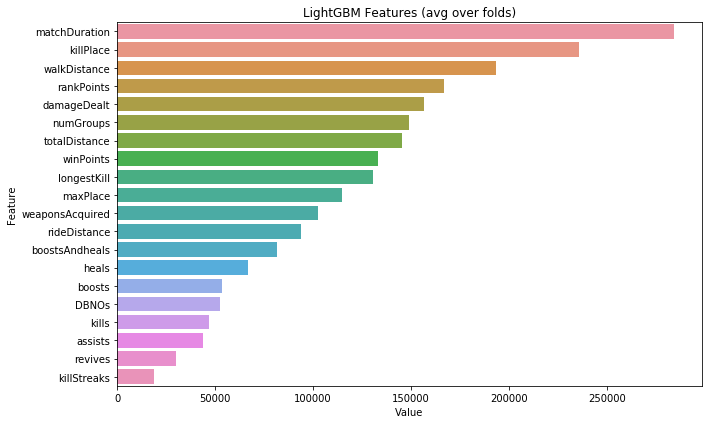

In [26]:
feature_importance = pd.DataFrame(sorted(zip(lgbm_reg_squad.feature_importances_, cols_to_fit_squad)), columns=['Value','Feature'])

plt.figure(figsize=(10, 6))
sns.barplot(x="Value", y="Feature", data=feature_importance.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()

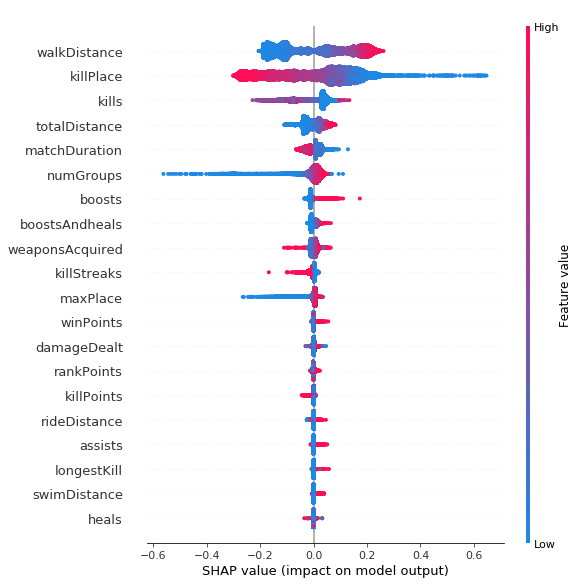

In [21]:
shap.summary_plot(shap_values_solo, val_solo[cols_to_fit_solo], feature_names=cols_to_fit_solo)

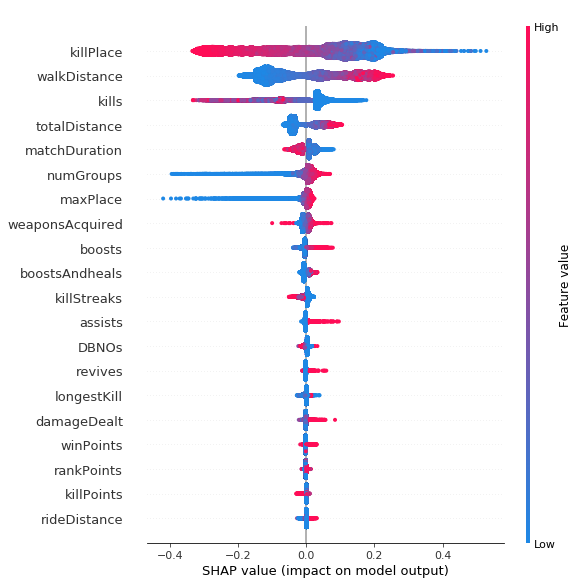

In [22]:
shap.summary_plot(shap_values_duo, val_duo[cols_to_fit_duo], feature_names=cols_to_fit_duo)

In [23]:
shap_values_squad

array([[-0.00376, -0.01504, -0.00195, ..., -0.00707,  0.00055, -0.00325],
       [-0.00215, -0.00659, -0.00285, ..., -0.02718,  0.00038, -0.00698],
       [-0.00582, -0.01631, -0.     , ..., -0.01604,  0.00015,  0.00486],
       ...,
       [-0.00218, -0.00695, -0.00164, ..., -0.01939,  0.00019, -0.00456],
       [-0.0043 , -0.00199, -0.00155, ..., -0.03168,  0.00039,  0.00517],
       [-0.00632, -0.0027 , -0.00093, ...,  0.04899, -0.00172,  0.00844]])

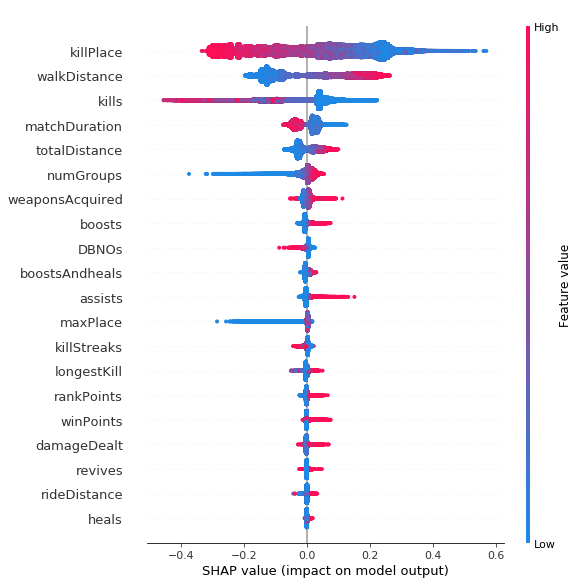

In [24]:
shap.summary_plot(shap_values_squad, val_squad[cols_to_fit_squad], feature_names=cols_to_fit_squad)

In [20]:

train_other, val_other = train_test_split(other, 0.1)

In [24]:
other

,Unnamed: 0,Unnamed: 0.1,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance,headshot_rate,boostsAndheals
0,1093,1093,c8ed6a171536e3,84748458aba82a,d4f1811cf6a04b,1,3,187.40,0,1,...,0.0,0,0,1342.000,1,0,0.4898,1342.0000,1.000000,9
1,1207,1207,fb785deb59f2bc,4438f77ac9f2e6,33d976b454b843,0,4,576.80,7,2,...,0.0,0,1,2563.000,6,0,0.8000,5111.0000,0.500000,8
2,1276,1276,d3c4dd2e585d21,6af9bb6b56b722,16e6befa897b44,0,0,0.00,0,0,...,0.0,0,0,0.000,0,0,0.0000,0.0000,0.000000,0
3,1524,1524,b0fbbe07014fcd,7ce6194a5dd609,e330f44c528e6f,0,0,20.94,0,0,...,0.0,0,0,13.640,1,0,0.0625,13.6400,0.000000,0
4,1790,1790,28390372a2cc4f,c529d05da4597b,be945f2803814a,0,0,0.00,0,0,...,0.0,0,0,459.600,0,0,0.2041,853.3000,0.000000,0
5,1904,1905,fd39e397db5de4,67d1056e060313,ab05fc989cba70,0,2,0.00,0,0,...,0.0,0,0,326.200,2,0,0.6522,6830.2000,0.000000,2
6,2110,2111,1f2775b6f994ae,580347c80ae6a3,098b32c9c9ceb3,0,0,0.00,1,0,...,0.0,1,0,1683.000,2,0,0.3714,2807.0000,0.000000,0
7,2591,2592,5ccc7597791b85,59468d09f86e8a,31e152f644e550,0,0,0.00,0,0,...,0.0,0,0,464.500,1,0,0.2333,464.5000,0.000000,0
8,2788,2789,ca51d0bf25412d,b55d170af46a7f,4488d50322ac9b,0,3,0.00,0,0,...,0.0,0,0,274.000,1,0,0.8511,6176.0000,0.000000,4
9,2886,2887,d1f525f1e237f4,d45f1a797f95d2,784889e9b79717,0,0,0.00,0,0,...,0.0,0,0,0.000,0,0,0.0000,0.0000,0.000000,0


In [21]:
cols_to_fit_other = ['killPlace','walkDistance','kills','matchDuration','totalDistance','numGroups',
                    'weaponsAcquired','boosts','DBNOs','boostsAndheals','assists','maxPlace','killStreaks',
                    'longestKill','rankPoints','winPoints','damageDealt','revives','rideDistance','heals']

In [25]:
params_other = {
    'objective': 'regression_l2', #'mae'
    'num_leaves': 300,  #
    'learning_rate': 0.1, #0.03
    'n_estimators': 1000, #6000
    'max_depth':12,
    'max_bin':100,  #
    'bagging_fraction':0.8,
    'bagging_freq':5,
    'feature_fraction':0.9,
    'metric': 'mae',
    'verbose':-1, 
    'early_stopping_rounds':100
    }




# LightGBM parameters
lgbm_reg_other = LGBMRegressor(**params_other)

lgbm_reg_other.fit(
    other[cols_to_fit_other], other[target],
    eval_set=[(val_other[cols_to_fit_other], val_other[target])],
    eval_metric='mae',
    verbose=50,
)

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's l1: 0.0377972
[100]	valid_0's l1: 0.0282832
[150]	valid_0's l1: 0.0227255
[200]	valid_0's l1: 0.0186569
[250]	valid_0's l1: 0.0156844
[300]	valid_0's l1: 0.0131732
[350]	valid_0's l1: 0.0115584
[400]	valid_0's l1: 0.00983374
[450]	valid_0's l1: 0.00848374
[500]	valid_0's l1: 0.00731703
[550]	valid_0's l1: 0.00652113
[600]	valid_0's l1: 0.00573191
[650]	valid_0's l1: 0.00507556
[700]	valid_0's l1: 0.0044789
[750]	valid_0's l1: 0.0039107
[800]	valid_0's l1: 0.0034774
[850]	valid_0's l1: 0.003087
[900]	valid_0's l1: 0.00276384
[950]	valid_0's l1: 0.00253848
[1000]	valid_0's l1: 0.00230866
Did not meet early stopping. Best iteration is:
[1000]	valid_0's l1: 0.00230866


LGBMRegressor(bagging_fraction=0.8, bagging_freq=5, boosting_type='gbdt',
       class_weight=None, colsample_bytree=1.0, early_stopping_rounds=100,
       feature_fraction=0.9, importance_type='split', learning_rate=0.1,
       max_bin=100, max_depth=12, metric='mae', min_child_samples=20,
       min_child_weight=0.001, min_split_gain=0.0, n_estimators=1000,
       n_jobs=-1, num_leaves=300, objective='regression_l2',
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0,
       verbose=-1)

In [26]:
import shap
shap.initjs()

In [27]:
explainer_other = shap.TreeExplainer(lgbm_reg_other)

In [28]:
shap_values_other = explainer_other.shap_values(val_other[cols_to_fit_other])

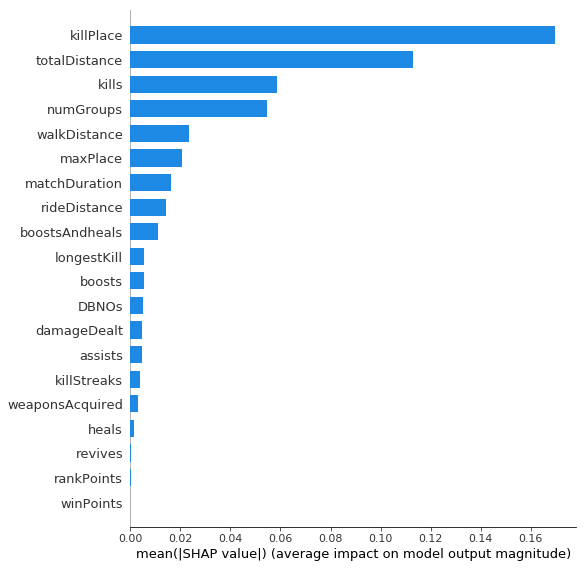

In [112]:
shap.summary_plot(shap_values_other, val_other[cols_to_fit_other], plot_type='bar')

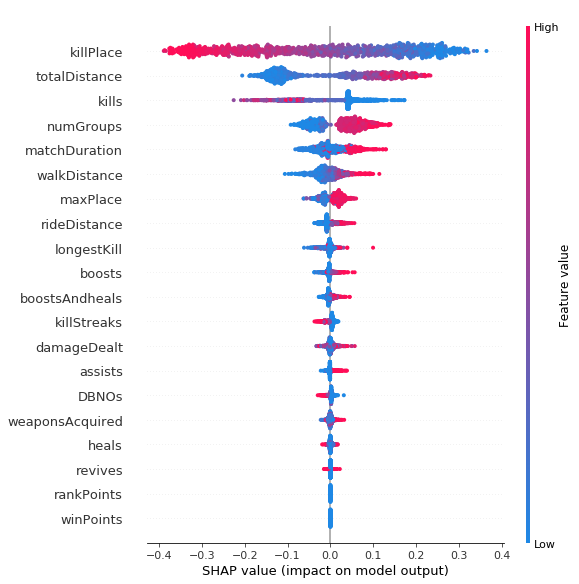

In [29]:
shap.summary_plot(shap_values_other, val_other[cols_to_fit_other], feature_names=cols_to_fit_other)

In [113]:
explainer_solo = shap.TreeExplainer(lgbm_reg_solo)

In [ ]:
shap_values_solo = explainer_solo.shap_values(val_solo[cols_to_fit_solo])

In [18]:
# 模型训练完毕，对test用
test = pd.read_csv('data/test.csv', sep=',')

In [19]:
test['headshot_rate'] = test['headshotKills'] / test['kills']
test['headshot_rate'] = test['headshot_rate'].fillna(0)
test['boostsAndheals'] = test['boosts']+test['heals']
test['totalDistance'] = test['rideDistance'] + test['walkDistance'] + test['swimDistance']

test.drop(columns = ['groupId'], inplace=True)
test.drop(columns = ['matchId'], inplace=True)

In [20]:
def modifyMatchType(data):
    data['matchType'][data['matchType'] == 'normal-solo'] = 'solo'
    data['matchType'][data['matchType'] == 'solo-fpp'] = 'solo'
    data['matchType'][data['matchType'] == 'normal-solo-fpp'] = 'solo'
    data['matchType'][data['matchType'] == 'normal-duo-fpp'] = 'duo'
    data['matchType'][data['matchType'] == 'normal-duo'] = 'duo'
    data['matchType'][data['matchType'] == 'duo-fpp'] = 'duo'
    data['matchType'][data['matchType'] == 'squad-fpp'] = 'squad'
    data['matchType'][data['matchType'] == 'normal-squad'] = 'squad'
    data['matchType'][data['matchType'] == 'normal-squad-fpp'] = 'squad'
    data['matchType'][data['matchType'] == 'flaretpp'] = 'Other'
    data['matchType'][data['matchType'] == 'flarefpp'] = 'Other'
    data['matchType'][data['matchType'] == 'crashtpp'] = 'Other'
    data['matchType'][data['matchType'] == 'crashfpp'] = 'Other'

    return data

test=modifyMatchType(test)

In [28]:
solo_test = test[test['matchType']=='solo']
duo_test = test[test['matchType']=='duo']
squad_test = test[test['matchType']=='squad']
other_test = test[test['matchType']=='Other']

In [50]:
other_test = test[test['matchType']=='Other']

In [29]:
solo_result = pd.DataFrame()
solo_result['Id']=solo_test['Id']
solo_test.drop(columns = ['Id'],inplace=True)

solo_result['winPlacePerc'] = lgbm_reg_solo.predict(solo_test[cols_to_fit_solo],num_iteration=lgbm_reg_solo.best_iteration_)


In [32]:
solo_result.winPlacePerc = solo_result.winPlacePerc.clip(0, 1)

In [33]:
solo_result

,Id,winPlacePerc
21,37ae98f31ca542,0.664445
29,6425cf14b2d488,0.334181
30,494d3d9fad73b2,0.117326
36,e59dd1435a2ecf,0.558465
41,3e4413d4780f7c,0.152311
52,7fc13cb6ff72da,0.556682
82,647cade6e4ed15,0.121837
90,b912e5782b1e48,0.285362
105,fc6d38774da7b2,0.000410
111,1da7afe09b7705,0.340999


In [34]:
duo_result = pd.DataFrame()
duo_result['Id']=duo_test['Id']
duo_test.drop(columns = ['Id'],inplace=True)

duo_result['winPlacePerc'] = lgbm_reg_duo.predict(duo_test[cols_to_fit_duo],num_iteration=lgbm_reg_duo.best_iteration_)
duo_result.winPlacePerc = duo_result.winPlacePerc.clip(0, 1)


In [35]:
duo_result

,Id,winPlacePerc
1,639bd0dcd7bda8,0.948595
3,cf5b81422591d1,0.521072
6,d812d2f1d88a02,0.721013
10,29da9623f0e316,0.294697
13,2f42b452cf99f7,0.764064
14,8ee93e13e67ae9,0.425117
18,d9463ae2916efb,0.209867
20,8a706bc525a3cb,0.792387
31,9a4e910d239dd4,0.622632
32,a1cc5b6bae918e,0.471280


In [36]:
squad_result = pd.DataFrame()
squad_result['Id']=squad_test['Id']
squad_test.drop(columns = ['Id'],inplace=True)

squad_result['winPlacePerc'] = lgbm_reg_squad.predict(squad_test[cols_to_fit_squad],num_iteration=lgbm_reg_squad.best_iteration_)
squad_result.winPlacePerc = squad_result.winPlacePerc.clip(0, 1)

In [37]:
squad_result

,Id,winPlacePerc
0,9329eb41e215eb,0.224339
2,63d5c8ef8dfe91,0.724915
4,ee6a295187ba21,0.952976
5,3e2539b5d78183,0.000027
7,a8a377e4d43bf8,0.264879
8,f18301e30d47d3,0.530234
9,ec7b965ef978b3,0.626960
11,9a7777f1868aba,0.274582
12,aeded11e3d6daa,0.965476
15,8e3d9efdb90cdc,0.689074


In [39]:
squad_result.to_csv("data/squad_result.csv",sep=",",header=True)
duo_result.to_csv("data/duo_result.csv",sep=",",header=True)
solo_result.to_csv("data/solo_result.csv",sep=",",header=True)

In [51]:
other_result = pd.DataFrame()
other_result['Id']=other_test['Id']
other_test.drop(columns = ['Id'],inplace=True)

other_result['winPlacePerc'] = lgbm_reg_other.predict(other_test[cols_to_fit_other],num_iteration=lgbm_reg_other.best_iteration_)
other_result.winPlacePerc = other_result.winPlacePerc.clip(0, 1)

In [108]:
other_result

,Id,winPlacePerc
781,a4943dd17dcb11,0.112359
1613,ef72584125b706,0.228162
2536,d1d9e926ba874d,0.169530
2573,32aed0f33cadf9,0.187174
2631,42337be5970209,0.018619
3075,8fb7dea3a702c4,0.062245
3335,cda66fe25dc701,0.868372
5607,131cbd0cdf9904,0.892662
5701,b007ae83190342,0.739345
5775,5b00059c556103,0.695896


In [53]:
other_result.to_csv("data/other_result.csv",sep=",",header=True)

In [57]:
result=pd.DataFrame()
result=solo_result.append(duo_result)

In [58]:
result=result.append(squad_result)

In [59]:
result=result.append(other_result)

In [60]:
result.to_csv("data/unordered_result.csv",sep=",",header=True)

,Id,winPlacePerc
21,37ae98f31ca542,0.664445
29,6425cf14b2d488,0.334181
30,494d3d9fad73b2,0.117326
36,e59dd1435a2ecf,0.558465
41,3e4413d4780f7c,0.152311
52,7fc13cb6ff72da,0.556682
82,647cade6e4ed15,0.121837
90,b912e5782b1e48,0.285362
105,fc6d38774da7b2,0.000410
111,1da7afe09b7705,0.340999


In [63]:
samplesub = pd.read_csv('data/samplesub.csv')

In [95]:
samplesub

,Id,winPlacePerc
0,9329eb41e215eb,1
1,639bd0dcd7bda8,1
2,63d5c8ef8dfe91,1
3,cf5b81422591d1,1
4,ee6a295187ba21,1
5,3e2539b5d78183,1
6,d812d2f1d88a02,1
7,a8a377e4d43bf8,1
8,f18301e30d47d3,1
9,ec7b965ef978b3,1


In [82]:
result = pd.read_csv('data/unordered_result.csv')

In [84]:
result.drop(columns = ['Unnamed: 0'], inplace=True)

In [86]:
result.index = result['Id']

In [98]:
result.reindex(samplesub['Id'])


TypeError: 'Series' object is not callable

In [93]:
result

,Id,winPlacePerc
Id,,
37ae98f31ca542,37ae98f31ca542,0.664445
6425cf14b2d488,6425cf14b2d488,0.334181
494d3d9fad73b2,494d3d9fad73b2,0.117326
e59dd1435a2ecf,e59dd1435a2ecf,0.558465
3e4413d4780f7c,3e4413d4780f7c,0.152311
7fc13cb6ff72da,7fc13cb6ff72da,0.556682
647cade6e4ed15,647cade6e4ed15,0.121837
b912e5782b1e48,b912e5782b1e48,0.285362
fc6d38774da7b2,fc6d38774da7b2,0.000410


In [94]:
result.reindex = (samplesub['Id'])

In [80]:
result

,Id,winPlacePerc
Id,,
37ae98f31ca542,37ae98f31ca542,0.664445
6425cf14b2d488,6425cf14b2d488,0.334181
494d3d9fad73b2,494d3d9fad73b2,0.117326
e59dd1435a2ecf,e59dd1435a2ecf,0.558465
3e4413d4780f7c,3e4413d4780f7c,0.152311
7fc13cb6ff72da,7fc13cb6ff72da,0.556682
647cade6e4ed15,647cade6e4ed15,0.121837
b912e5782b1e48,b912e5782b1e48,0.285362
fc6d38774da7b2,fc6d38774da7b2,0.000410
